<a href="https://colab.research.google.com/github/walidBarakeh/git_test/blob/master/Copy_of_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pylab inline
plt.style.use("bmh")

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['yticks']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
import pathlib
import pandas as pd
import numpy as np
import csv
import math 
import timeit
import seaborn as sns

In [ ]:
DATA_DIR = pathlib.Path("/content/sample_data")

In [ ]:
train = pd.read_csv(DATA_DIR / "diabetic_data.csv", index_col="encounter_id")
train.head(20)

,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
encounter_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,?,?,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30
55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,?,?,70,1,21,0,0,0,414,411,V45,7,None,None,Steady,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,?,?,73,0,12,0,0,0,428,492,250,8,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,>30
12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,?,?,68,2,28,0,0,0,398,427,38,8,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
train.replace(to_replace='?',value= None,inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101766 entries, 2278392 to 443867222
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   patient_nbr               101766 non-null  int64 
 1   race                      101766 non-null  object
 2   gender                    101766 non-null  object
 3   age                       101766 non-null  object
 4   weight                    101766 non-null  object
 5   admission_type_id         101766 non-null  int64 
 6   discharge_disposition_id  101766 non-null  int64 
 7   admission_source_id       101766 non-null  int64 
 8   time_in_hospital          101766 non-null  int64 
 9   payer_code                101766 non-null  object
 10  medical_specialty         101766 non-null  object
 11  num_lab_procedures        101766 non-null  int64 
 12  num_procedures            101766 non-null  int64 
 13  num_medications           101766 non-null  int64 


In [ ]:
train.describe()

,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [ ]:

for column in train.columns:
    print('==============================')
    print(f"{column} : {train[column].unique()}")

patient_nbr : [  8222157  55629189  86047875 ... 140199494 120975314 175429310]
race : ['Caucasian' 'AfricanAmerican' 'Other' 'Asian' 'Hispanic']
gender : ['Female' 'Male' 'Unknown/Invalid']
age : ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
weight : ['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']
admission_type_id : [6 1 2 3 4 5 8 7]
discharge_disposition_id : [25  1  3  6  2  5 11  7 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27]
admission_source_id : [ 1  7  2  4  5  6 20  3 17  8  9 14 10 22 11 25 13]
time_in_hospital : [ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]
payer_code : ['?' 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP' 'FR']
medical_specialty : ['Pediatrics-Endocrinology' 'InternalMedicine' 'Family/GeneralPractice'
 'Cardiology' 'Surgery-General' 'Orthopedics' 'Gastroenterology'
 'Surgery-Cardiovascular/Thoracic' 'Nephrol

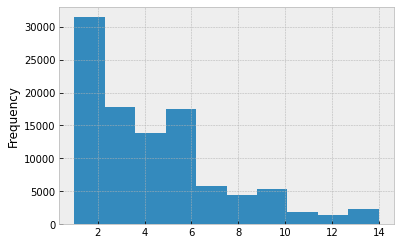

In [ ]:
train.time_in_hospital.plot.hist()

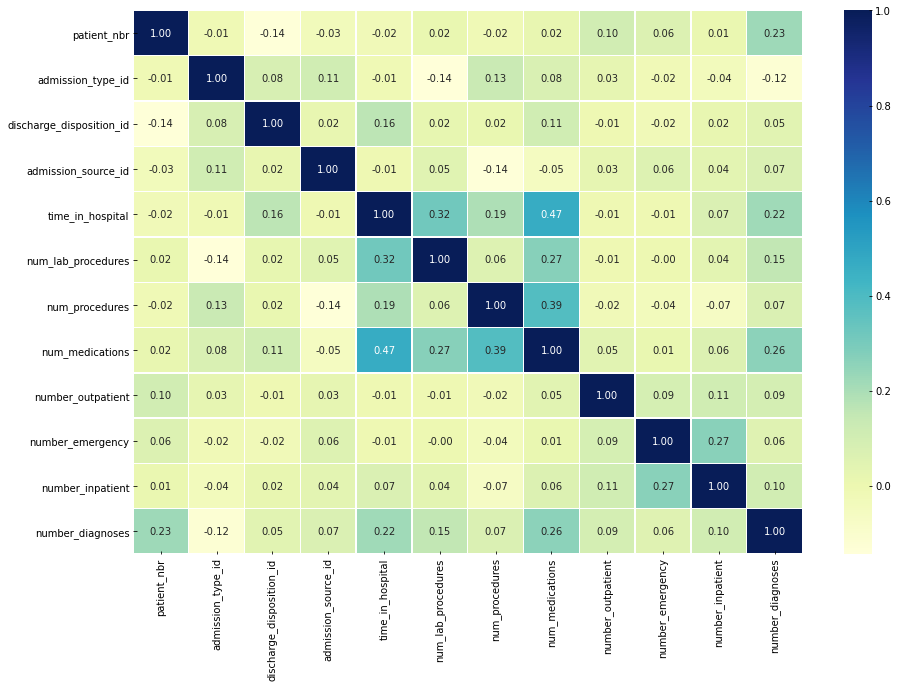

In [ ]:
#Create a correlation matrix
corr_matrix = train.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu")

In [ ]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

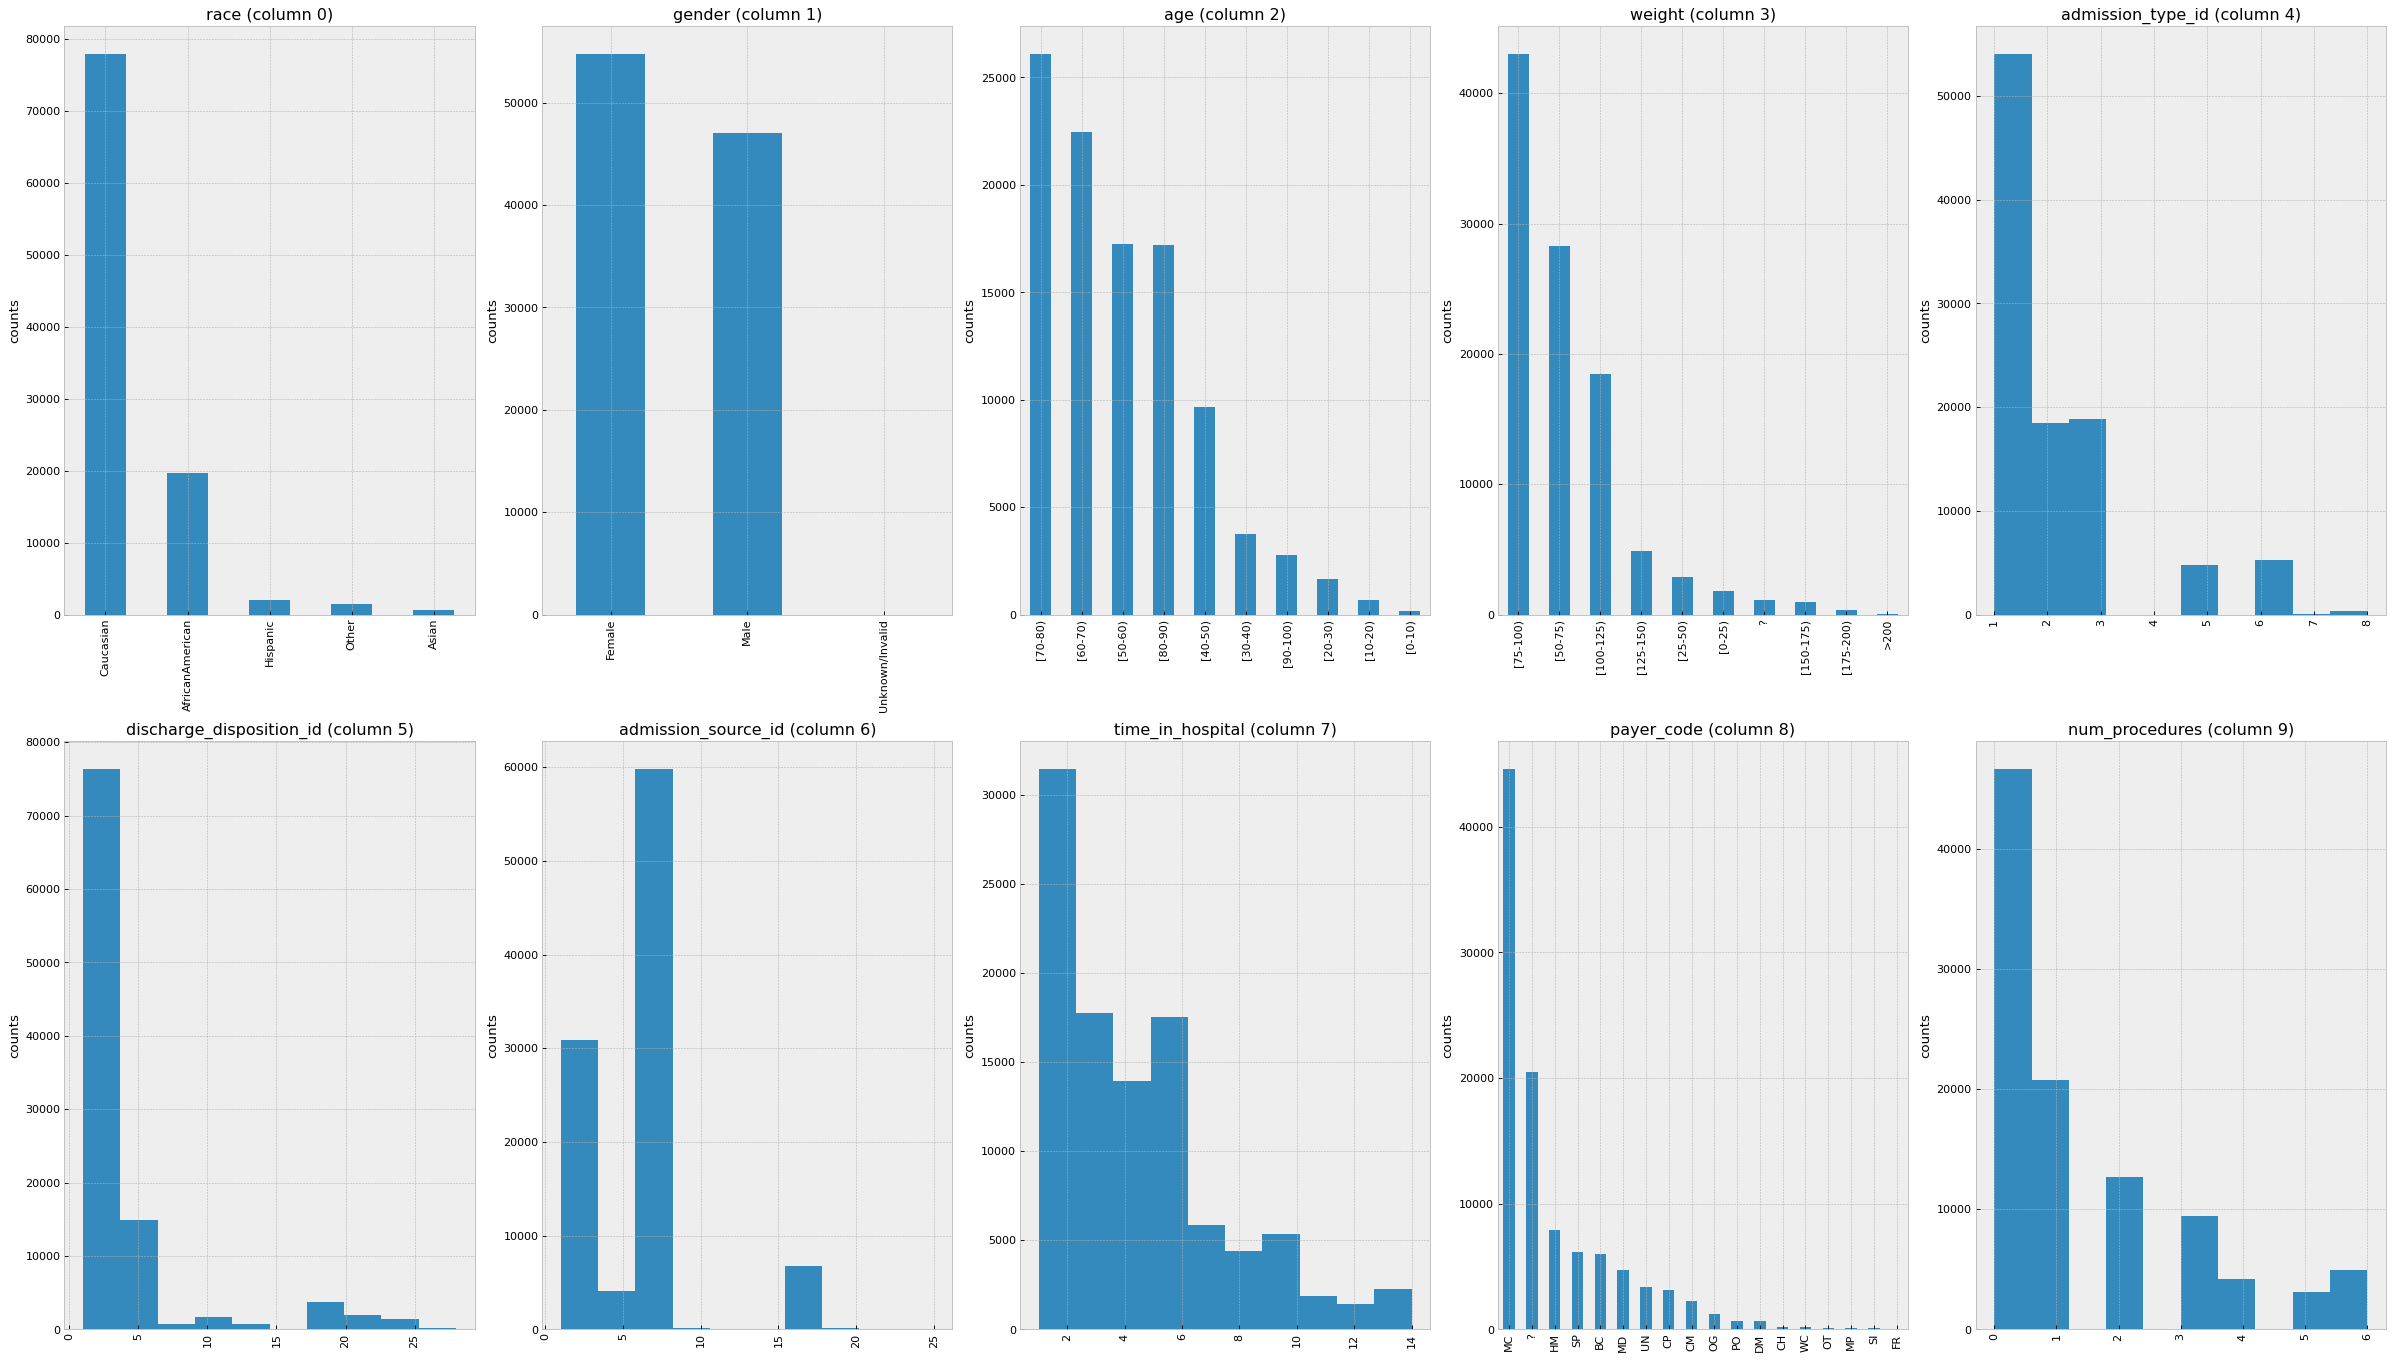

In [ ]:
plotPerColumnDistribution(train, 10, 5)

In [ ]:
train.groupby('patient_nbr').size().sort_values(ascending=False).head(20)

patient_nbr
88785891    40
43140906    28
88227540    23
1660293     23
23199021    23
84428613    22
23643405    22
92709351    21
37096866    20
29903877    20
90609804    20
88789707    20
23398488    20
89472402    20
88479036    19
88681950    19
97391007    19
3401055     18
84348792    18
91751121    18
dtype: int64

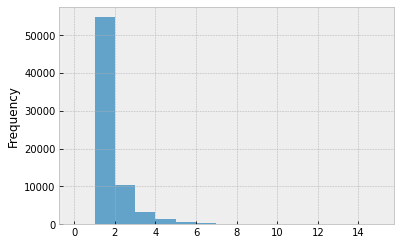

In [ ]:

train.groupby('patient_nbr').size().plot.hist(bins=15,alpha=0.75,range=(0,15))

In [ ]:
from typing import Optional, Union, Tuple

def plot_hist(series: pd.Series,
              figsize: Tuple[float, float] = (6, 6),
              fontsize: Optional[float] = 12,
              bins: int = 10,
              hrange: Optional[Tuple[float, float]] = None,
              xlabel: Optional[str] = None,
              ylabel: Optional[str] = None,
              title: Optional[str] = None,              
              xticks: Optional[Union[list, np.ndarray]] = None,
              xticks_labels: Optional[list] = None,
              xlim: Optional[Tuple[float, float]] = None,
              ylim: Optional[Tuple[float, float]] = None):
    """Flexible hitogram plotting."""

    plt.figure(figsize=figsize)

    # Plot
    series.plot(kind="hist", range=hrange, bins=bins)

    # Prettify
    if xlabel: plt.xlabel(xlabel)
    if ylabel: plt.ylabel(ylabel)
    if title: plt.title(title, fontsize=fontsize)
    if xticks is not None: plt.xticks(xticks, xticks_labels)
    if xlim: plt.xlim(*xlim)

    plt.show()

In [ ]:
numeric_features=["time_in_hospital","num_lab_procedures", "num_procedures", "num_medications", "number_outpatient", "number_emergency","number_inpatient","number_diagnoses"]

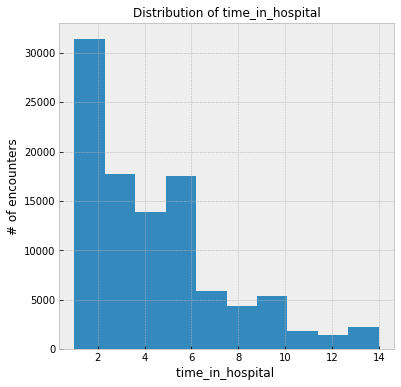

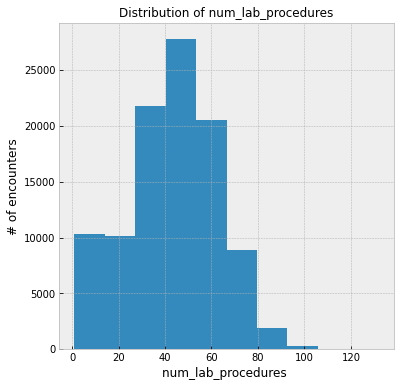

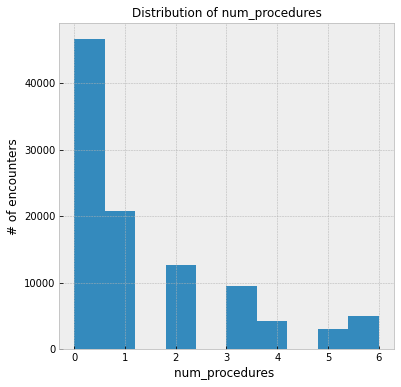

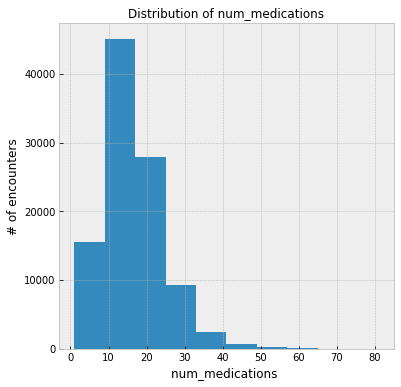

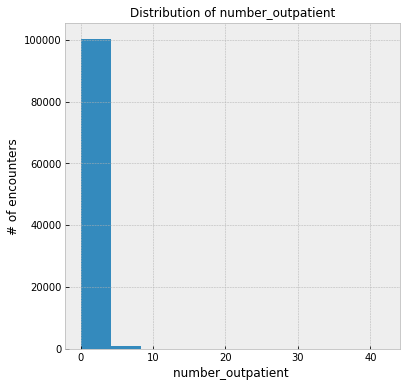

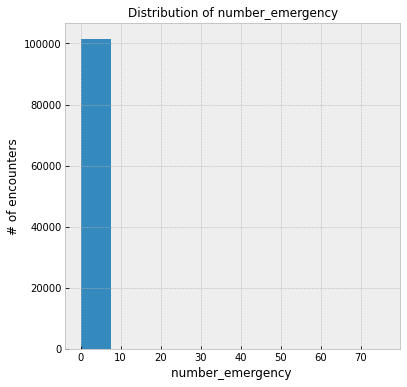

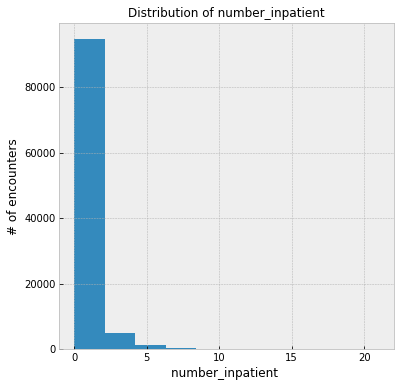

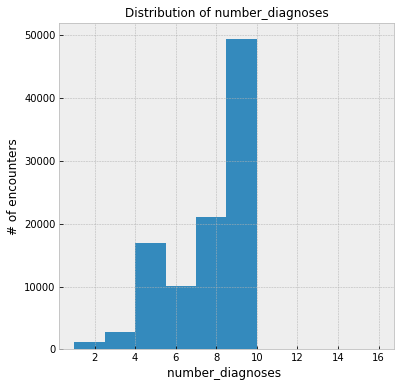

In [ ]:
for feature_idx in numeric_features:
  plot_hist(train[feature_idx],
          xlabel="{0} ".format(feature_idx), ylabel="# of encounters", title="Distribution of {0}".format(feature_idx))

In [ ]:
def plot_boxplot(data: pd.DataFrame, cat_col: str, num_col: str,
                 figsize: Tuple[float, float] = (6, 6),
                 fontsize: float = 12,
                 rot: float = 90,
                 num_filter_gt: Optional[float] = None,
                 num_filter_lt: Optional[float] = None,
                 xlabel: Optional[str] = None,
                 ylabel: Optional[str] = None,
                 title: Optional[str] = None,
                 yticks: Optional[Union[list, np.ndarray]] = None,
                 yticks_labels: Optional[list] = None,
                 ylim: Optional[Tuple[float, float]] = None):
    """Flexible boxplot plotting."""

    plt.figure(figsize=figsize)

    if num_filter_gt:
        data = data[data[num_col] > num_filter_gt]
    if num_filter_lt:
        data = data[data[num_col] < num_filter_lt]
    if data.empty:
        return

    data.boxplot(num_col, by=cat_col, ax=plt.gca(), rot=rot)

    if ylim: plt.ylim(*ylim)
    if ylabel: plt.ylabel(ylabel)
    if title: plt.title(title, fontsize=fontsize)
    if yticks is not None: plt.yticks(yticks, yticks_labels)

    plt.suptitle("")
    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


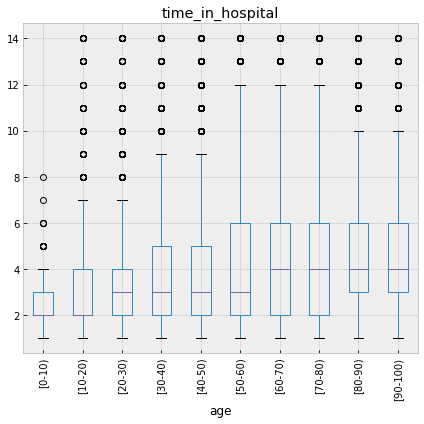

In [ ]:

plot_boxplot(train,"age","time_in_hospital")

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


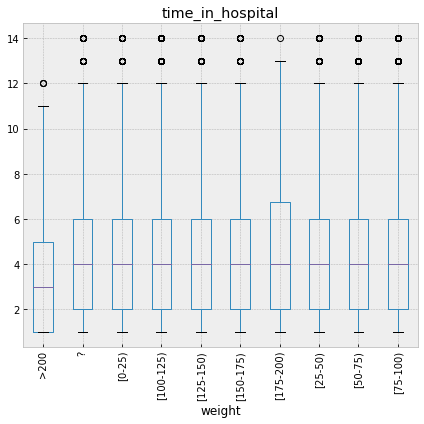

In [ ]:
plot_boxplot(train,"weight","time_in_hospital")

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


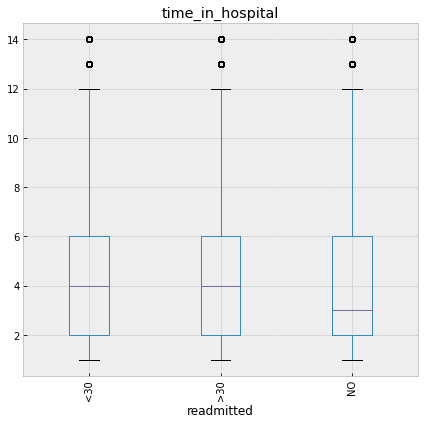

In [ ]:
plot_boxplot(train,"readmitted","time_in_hospital")

In [ ]:
TARGET="time_in_hospital"
irrelevant_Columns=['admission_source_id', 'admission_type_id', 'discharge_disposition_id','encounter_id', 'patient_nbr']

NUM_COLS = (train
            .select_dtypes("int")
            .columns
            .union(train
                   .select_dtypes("float")
                   .columns).difference(irrelevant_Columns))


In [ ]:
cr = train[numeric_features].corr()
cr



,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
time_in_hospital,1.000000,0.318450,0.191472,0.466135,-0.008916,-0.009681,0.073623,0.220186
num_lab_procedures,0.318450,1.000000,0.058066,0.268161,-0.007602,-0.002279,0.039231,0.152773
num_procedures,0.191472,0.058066,1.000000,0.385767,-0.024819,-0.038179,-0.066236,0.073734
num_medications,0.466135,0.268161,0.385767,1.000000,0.045197,0.013180,0.064194,0.261526
number_outpatient,-0.008916,-0.007602,-0.024819,0.045197,1.000000,0.091459,0.107338,0.094152
number_emergency,-0.009681,-0.002279,-0.038179,0.013180,0.091459,1.000000,0.266559,0.055539
number_inpatient,0.073623,0.039231,-0.066236,0.064194,0.107338,0.266559,1.000000,0.104710
number_diagnoses,0.220186,0.152773,0.073734,0.261526,0.094152,0.055539,0.104710,1.000000


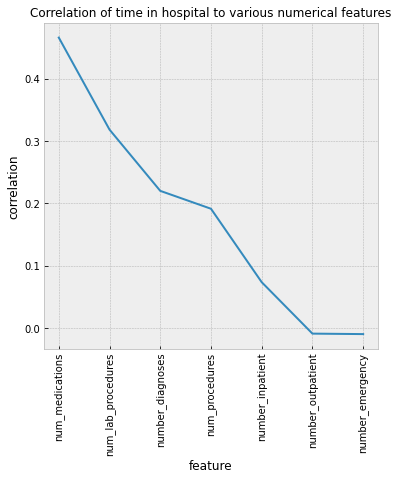

In [ ]:
plt.figure(figsize=(6,6))

(cr
 .loc[TARGET, NUM_COLS.difference([TARGET])]
 .sort_values(ascending=False)
 .plot(rot=90))

plt.xlabel("feature")
plt.ylabel("correlation")

plt.title("Correlation of time in hospital to various numerical features", fontsize=12);

In [ ]:
# Top 3 Features
(cr
 .loc[TARGET, NUM_COLS.difference([TARGET])]
 .sort_values(ascending=False)
 .iloc[:3])

num_medications       0.466135
num_lab_procedures    0.318450
number_diagnoses      0.220186
Name: time_in_hospital, dtype: float64

In [ ]:
train[train.readmitted=='<30'].groupby("age")["time_in_hospital"].mean().idxmax()

'[70-80)'

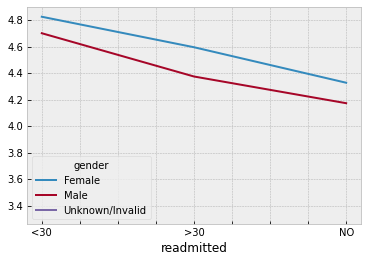

In [ ]:
train.groupby(["readmitted", "gender"])["time_in_hospital"].mean().unstack().plot()

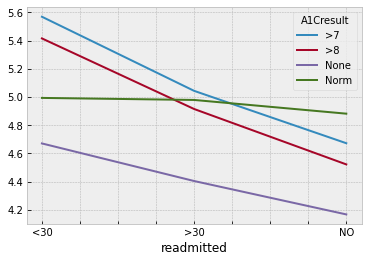

In [ ]:
train.groupby(["readmitted", "A1Cresult"])["time_in_hospital"].mean().unstack().plot()

In [ ]:
a1cresult=train.groupby(["readmitted", "A1Cresult"])["time_in_hospital"].count().unstack()

In [ ]:
population=train.groupby("readmitted").size().reset_index(name='Total')

In [ ]:
aggregated= pd.merge(a1cresult,population,on='readmitted')


In [ ]:
total_total=aggregated.Total.sum()

In [ ]:
cl=['>7', '>8', 'None', 'Norm']
for column in cl:      
    aggregated[column]=aggregated[column]*100/aggregated['Total']
aggregated['Total_perc']=aggregated['Total']*100/total_total

In [ ]:
aggregated[aggregated['readmitted']=='<30']

,readmitted,>7,>8,None,Norm,Total,Total_perc
0,<30,3.372369,7.14097,85.242582,4.244079,11357,11.159916


In [ ]:
a1cresult_male_female=train[train["readmitted"]=='<30'].groupby(["gender", "A1Cresult"])["time_in_hospital"].count().unstack()

In [ ]:
a1cresult_male_female

A1Cresult,>7,>8,None,Norm
gender,,,,
Female,218,430,5253,251
Male,165,381,4428,231


In [ ]:
population_male_female=train[train["readmitted"]=='<30'].groupby("gender").size().reset_index(name='Total')

In [ ]:
population_male_female

,gender,Total
0,Female,6152
1,Male,5205


In [ ]:
yr_counts = a1cresult_male_female.notnull().sum(axis=0)
COLS = yr_counts.index
COLS

Index(['>7', '>8', 'None', 'Norm'], dtype='object', name='A1Cresult')

Text(0.5, 1.0, 'Total readmitted per a1cresult per gender')

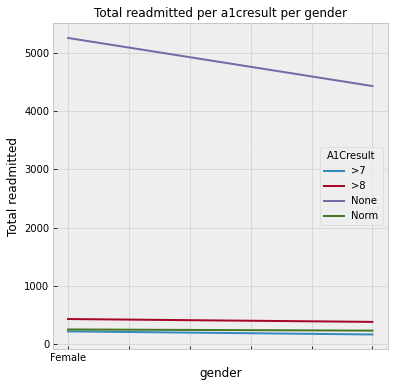

In [ ]:
plt.figure(figsize=(6, 6))

a1cresult_male_female[COLS].plot(ax=plt.gca())


plt.xlabel("gender")
plt.ylabel("Total readmitted")

plt.title("Total readmitted per a1cresult per gender", fontsize=12)
